# 0. 라이브러리 및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)

library version check
numpy:  1.23.5
pandas:  1.5.1
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 2. DT로 분류

In [4]:
iris = pd.read_csv("../data/Iris.csv",
                   index_col = 0)

In [5]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [6]:
# 네 개의 feature를 모두 넣고 분류
x_data = iris[iris.columns[:-1]]
y_data = iris["Species"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.30,
                                                    random_state = 97)

In [8]:
y_test.value_counts()

Iris-versicolor    16
Iris-virginica     16
Iris-setosa        13
Name: Species, dtype: int64

In [9]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
33,5.2,4.1,1.5,0.1
63,6.0,2.2,4.0,1.0
134,6.3,2.8,5.1,1.5
120,6.0,2.2,5.0,1.5
119,7.7,2.6,6.9,2.3
...,...,...,...,...
5,5.0,3.6,1.4,0.2
70,5.6,2.5,3.9,1.1
29,5.2,3.4,1.4,0.2


* [Decision Tree 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* criterion: 불순도를 계산할 함수
    * gini, entropy
    * 두 함수가 비슷한 결과를 냄
* splitter: 노드를 분할하는 방법
    * best: 정보의 이득이 최대가 될 때
    * random: 랜덤하게. best 보다 random이 더 효과적일 때도 있음
* max_depth: 몇 층까지 가지를 칠 것인지
    * 설정하지 않으면 불순도가 0이되거나 min_samples_split보다 샘플수가 적을 때까지 가지를 침  
    * max_depth = 1로 준 DT를 스텀프라고 부름. 부스터로 사용하면 강력해 질 수 있음
* min_samples_split: 노드를 나누기 위한 최소 샘플 수
    * 최소 2개는 샘플이 있어야 가지를 치기 때문에 default는 2이다.
* min_samples_leaf: leaf의 최소 샘플 수
    * leaf노드는 최소 1개의 샘플을 가지고 있어야 함. 
    * 만약  min_samples_leaf를 4로 준다면 모든 리프 노드가 최소 4개의 샘플을 가지고 있게 된다.
* max_features: 특성의 개수
    * input의 특성에서 max_features만큼 랜덤하게 추출
* random_state: max_features만큼 특성을 랜덤하게 선택하기 때문에 필요
* max_leaf_nodes: 리프 노드의 전체 샘플 개수
* min_impurity_decrease: 가지를 치기 위한 최소 불순도 감소

**일반적으로 max 이름을 가진 하이퍼파라미터는 감소하고, min 이름을 가진 하이퍼파라미터는 증가 시키면 모델의 성능이 향상됨**

In [10]:
model = DecisionTreeClassifier(max_depth = 3, random_state=97) 
model.fit(x_train.values, y_train.values)
prediction = model.predict(x_test.values)
print('The accuracy of DT is', 
      metrics.accuracy_score(prediction, y_test))

The accuracy of DT is 0.8888888888888888


* model.tree_에 학습에 대한 정보를 가지고 있음

In [11]:
print("DT모델의 노드 수: ", model.tree_.node_count)
print("DT모델의 각 노드별 샘플 수: ", model.tree_.n_node_samples)

DT모델의 노드 수:  9
DT모델의 각 노드별 샘플 수:  [105  37  68  34  33   1  34   4  30]


# 3. DT의 원리

In [12]:
# from io import StringIO
import graphviz
from sklearn.tree import export_graphviz
# from sklearn.feature_selection import mutual_info_classif

In [13]:
# DT나 RF는 분류 결과에 영향을 미친 요소를 수치화하여 볼 수 있음
model.feature_importances_

array([0.        , 0.        , 0.44004076, 0.55995924])

In [14]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

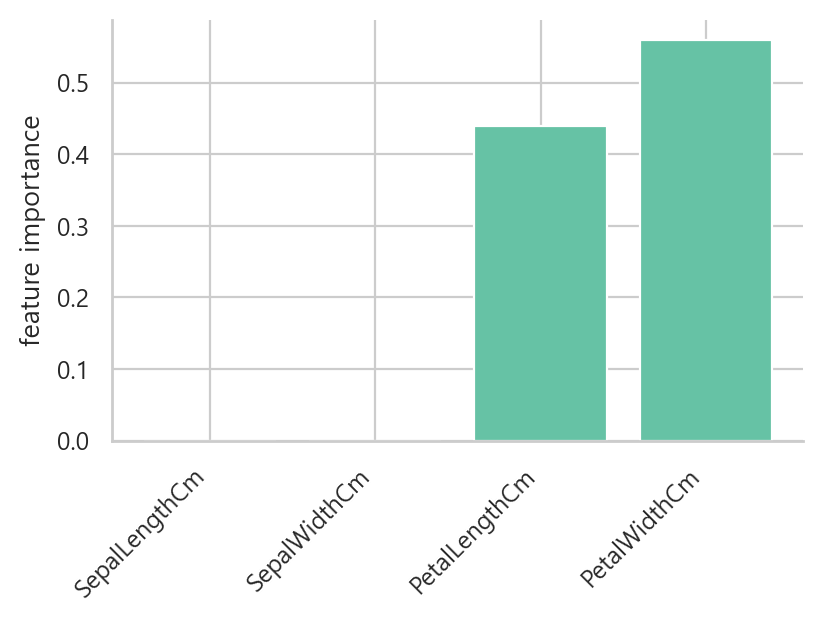

In [15]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(iris.columns[:-1], model.feature_importances_)
ax.spines[["top", "right"]].set_visible(False)
ax.set(ylabel = "feature importance")

plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

In [16]:
img = export_graphviz(model, out_file='../data/decision_tree_01.dot')

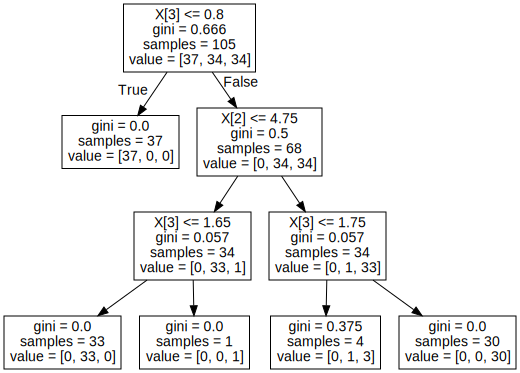

In [17]:
with open("../data/decision_tree_01.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

**용어**
* 노드
    * 부모노드
    * 자식노드
* depth
* leaf

## 3.1 부모노드에서 가지를 치는 특성과 기준은 어떻게 정해지는가?

**splitter = 'best'라면**

$\rightarrow$ 정보의 이득 즉, information gain(IG)이 최대가 되는 특성과 조건으로 정해진다!

**Information Gain에 대해서 알아보자**

어떤 특성 $f_i$에 대한 부모 노드 $D_p$의 Information Gain은 다음과 같이 얻을 수 있다:
\begin{equation}
IG(D_p, f_i)=G(D_p)-\frac{N_{l}}{N_p}G(D_{l})-\frac{N_{r}}{N_p}G(D_{r}),
\end{equation}
여기서

* $f_i$: $i$-번째 특성,
* $D_p$: 부모 노드,
* $D_{l}$: 부모 노드 $D_p$에서 가기치기한 왼쪽 자식 노드,
* $D_{r}$: 부모 노드 $D_p$에서 가기치기한 오른쪽 자식 노드
    
이다. $j\in\{p, l, r\}$에 대해서
    
* $N_j$: $D_j$ 노드의 총 샘플 수, 
* $G(D_j)$: $D_j$에서 Gini impurity(불순도)

를 의미한다. 클래스가 $0, 1, 2, \ldots, K$일 때 $j\in\{p, l, r\}$에 대해서 Gini impurity $G(D_j)$는 다음과 같이 정의한다:
\begin{equation}
G(D_j)=1-\sum_{i=0}^K\left(\frac{N_{j,i}}{N_j}\right)^2,
\end{equation}
여기서 $N_{j,i}$는 $D_j$ 노드의 총 샘플 수 중 클래스 $i$에 속하는 샘플의 수이다.

**Gini 불순도를 이해하자**

* 불순도: 어떤 노드에서 서로 다른 클래스가 얼마나 섞여있는가
* 한 클래스에 몰려 있을수록 불순도가 낮고
* 다양한 클래스가 섞여 있을 수록 불순도가 높다
* sklearn에는 `criterion` 옵션으로 불순도 함수를 정할 수 있고 `default="gini"`이다.

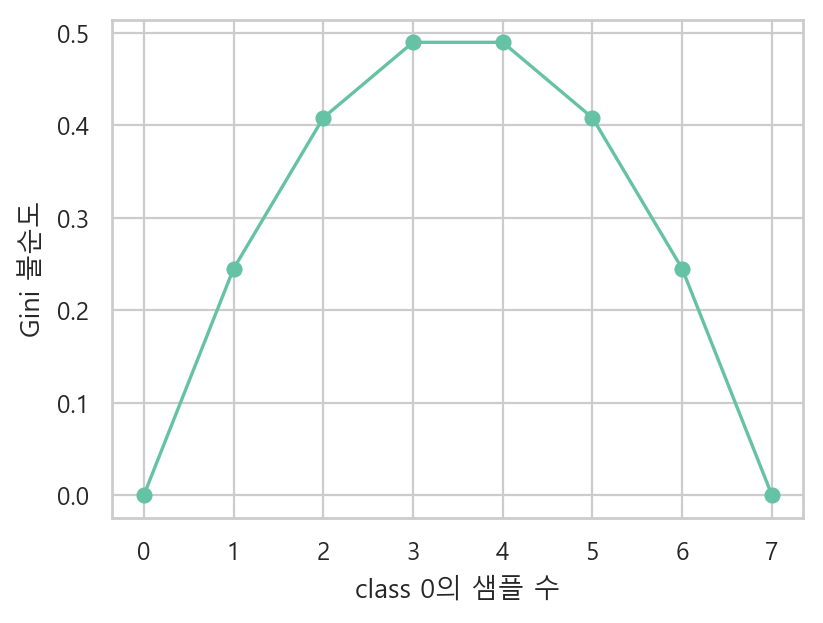

In [18]:
# 클래스가 2개일 때 gini impurity를 계산해 보자
n = 7
i = np.arange(8)
gini = 1 - (i/n)**2 - ((n-i)/n)**2

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(i, gini, marker ="o");
ax.set(xlabel = "class 0의 샘플 수",
       ylabel = "Gini 불순도");

In [19]:
# 클래스가 3개라면?

class_list = np.array([[6,0], [5,1], [4,2], [4,1], 
                       [3,3], [3,2], [2,2]])
i = class_list[:, 0]
j = class_list[:, 1]

gini = 1 - (i/n)**2 - (j/n)**2 - ((n-i-j)/n)**2

gini

array([0.24489796, 0.44897959, 0.57142857, 0.57142857, 0.6122449 ,
       0.65306122, 0.65306122])

**Information Gain을 계산해 보자.**


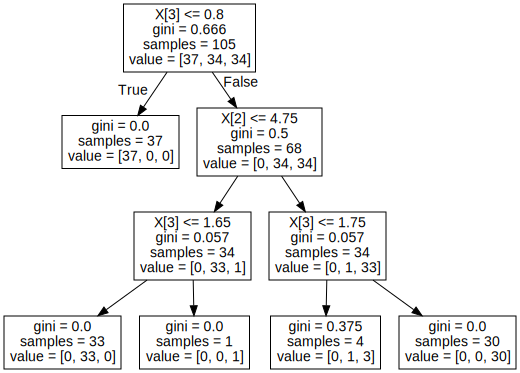

In [20]:
graphviz.Source(dot_graph)

* depth 0의 부모 노드의 정보의 이득을 계산해 보자

\begin{align}
G(D_p)&=1-\left(\frac{37}{105}\right)^2-\left(\frac{34}{105}\right)^2-\left(\frac{34}{105}\right)^2\doteqdot 0.666\\
G(D_{l})& = 1- \left(\frac{37}{37}\right)^2 - \left(\frac{0}{37}\right)^2 - \left(\frac{0}{37}\right)^2= 0\\
G(D_{r})& = 1- \left(\frac{0}{68}\right)^2 - \left(\frac{34}{68}\right)^2-\left(\frac{34}{68}\right)^2 = 0.5
\end{align}

\begin{align}
IG(D_p, f_i)&=G(D_p)-\frac{N_{l}}{N_p}G(D_{l})-\frac{N_{r}}{N_p}G(D_{r})\\
&=0.666-\frac{37}{105}\cdot 0-\frac{68}{105}\cdot0.5\\
&\doteqdot 0.342
\end{align}

* depth 1의 오른쪽 부모 노드의 정보의 이득을 계산해 보자
\begin{align}
G(D_p)&=1-\left(\frac{0}{68}\right)^2 - \left(\frac{34}{68}\right)^2-\left(\frac{34}{68}\right)^2 = 0.5\\
G(D_{l})& = 1- \left(\frac{0}{34}\right)^2-\left(\frac{33}{34}\right)^2 - \left(\frac{1}{34}\right)^2 \doteqdot 0.057\\
G(D_{r})& = 1- \left(\frac{0}{34}\right)^2- \left(\frac{1}{34}\right)^2-\left(\frac{33}{34}\right)^2 \doteqdot 0.057
\end{align}

\begin{align}
IG(D_p, f_i)&=G(D_p)-\frac{N_{l}}{N_p}G(D_{l})-\frac{N_{r}}{N_p}G(D_{r})\\
&=0.5-\frac{34}{68}\cdot 0.057-\frac{34}{68}\cdot 0.057\\
&\doteqdot 0.442
\end{align}

**Decision Tree는 Information Gain이 최대가 되는 feature와 value에서 가지를 친다!**

**테스트 데이터는 어떻게 분류하지?**

In [34]:
x_test.iloc[12]

SepalLengthCm    6.3
SepalWidthCm     2.5
PetalLengthCm    4.9
PetalWidthCm     1.5
Name: 73, dtype: float64

In [27]:
x_test.iloc[0]

SepalLengthCm    5.3
SepalWidthCm     3.7
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 49, dtype: float64

In [28]:
model.predict(x_test.values)[0]

'Iris-setosa'

In [30]:
model.predict_proba(x_test.values)[12]

array([0.  , 0.25, 0.75])

In [35]:
model.predict(x_test.values)[12]

'Iris-virginica'

## 3.2 Feature Importance

In [36]:
model.feature_importances_

array([0.        , 0.        , 0.44004076, 0.55995924])

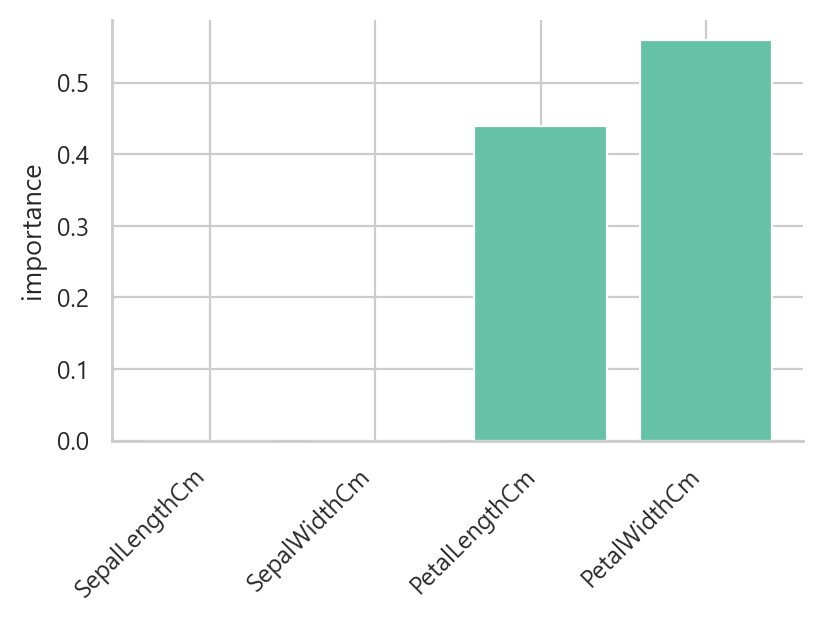

In [31]:
fig, ax = plt.subplots(figsize=(4,3))

ax.bar(iris.columns[:-1], model.feature_importances_)
ax.spines[["top", "right"]].set_visible(False)
ax.set(ylabel = "importance")

plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

어떤 특성 $f_i$에 대한 중요도 $I(f_i)$는 다음과 같이 얻을 수 있다:
\begin{equation}
I(f_i) = \sum_{\substack{p\in f_i\text{에 의해} \\ \text{가지치기한 부모 노드}}}\frac{N_p}{N}\left(G(D_p) - \frac{N_{l}}{N_p}G(D_l) - \frac{N_{r}}{N_p}G(D_r)\right)
\end{equation}

이것을 정규화하게 되면 
\begin{equation}
I(f_i)_{\text{normalize}} = \frac{I(f_i)}{\sum_{j\in\text{all features}}I(f_j)}
\end{equation}
이 된다. 

따라서, 

\begin{align}
I(f_{2}) = \frac{68}{105}\left(0.5 - \frac{34}{68}\cdot 0.057 - \frac{34}{68}\cdot 0.057\right)
\doteqdot 0.286
\end{align}

\begin{align}
I(f_3) &= \frac{105}{105}\left(0.666 - \frac{37}{105}\cdot 0 - \frac{68}{105}\cdot 0.5\right)
+\frac{34}{105}\left(0.057- \frac{33}{34}\cdot 0 - \frac{1}{34}\cdot 0\right)
+\frac{34}{105}\left(0.057- \frac{4}{34}\cdot 0.375 - \frac{30}{34}\cdot 0\right)\doteqdot 0.364,
\end{align}

이고, 이것을 정규화하면
\begin{align}
I(f_{2})_{\text{normalize}} &= \frac{I(f_{2})}{I(f_2)+I(f_{3})} \doteqdot 0.439\\
I(f_3)_{\text{normalize}} &= \frac{I(f_3)}{I(f_2)+I(f_{3})} \doteqdot 0.560.
\end{align}

# 240527 과제

* depth 0에서 $X[3]<=0.8$일 때 Information Gain이 최대인지 확인하시오